- `conda activate mri`
  - (created in `0_setup.ipynb`)

---

- `jupyter lab` => open this file

---

- Selected Jupyter default kernel (`ipykernel`)

---

---

# Find Contiguous Slices Appropriate for Registered Scans

---

Find inferior + 42-slice range with:  

__lateral ventricles, periventricular white matter, corpus callosum__, up to juxtacortical white matter/interhemispheric fissure

---

---

---

__NOTE:__
- __Visuals below are for illustrative purposes only__.
- The actual __MRI slice ranges used were selected by running the interactive script below__.
  - These ranges are reflected in the `Above scans binned below` sections following visualizations.

---

---

---

__Slice Range Selector Script__  

(run from command line)

---

---

```
import glob
import os
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

def interactive_mri_visualization(scan, slice_positions, selected_scans):
    """
    Displays one pair of low/high MRI slices (from the given scan) at a time.
    
    - scan: a file path to the scan (or a nibabel image object; here we assume a path)
    - slice_positions: list of fractional positions (or absolute indices) for the low slice.
      (For fractional positions, the low slice is computed as int(total_slices * pos).)
    - selected_scans: a dict that maps the slice position index (0...len(slice_positions)-1)
      to a list of scan paths that were “accepted” when that slice was shown.
    """
    # Load the MRI scan using nibabel.
    img = nib.load(scan)
    data = img.get_fdata()
    num_slices = data.shape[2]
    
    # Compute the low and high slice indices for each slice position.
    low_indices = []
    high_indices = []
    for pos in slice_positions:
        # If pos < 1 assume it is a fraction, otherwise assume it is an absolute index.
        if pos < 1:
            low_idx = int(num_slices * pos)
        else:
            low_idx = int(pos)
        # High slice is 42 slices above the low slice (or the last slice, if that goes out of bounds)
        high_idx = min(low_idx + 42, num_slices - 1)
        low_indices.append(low_idx)
        high_indices.append(high_idx)
    
    # We'll use a mutable container (a one‐element list) for the current index.
    current_index = [0]  # start with the first slice position

    # Set up the figure with two side‐by‐side subplots for the low and high slices.
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plt.subplots_adjust(bottom=0.3)  # make room for buttons

    # Display the initial slices
    im_low = axs[0].imshow(data[:, :, low_indices[current_index[0]]].T,
                           cmap='gray', origin='lower')
    axs[0].set_title(f"Low Slice: {low_indices[current_index[0]]}")
    axs[0].axis('off')

    im_high = axs[1].imshow(data[:, :, high_indices[current_index[0]]].T,
                            cmap='gray', origin='lower')
    axs[1].set_title(f"High Slice: {high_indices[current_index[0]]}")
    axs[1].axis('off')

    # Create button axes (you can adjust these positions as needed)
    ax_up = plt.axes([0.3, 0.15, 0.1, 0.075])
    ax_down = plt.axes([0.45, 0.15, 0.1, 0.075])
    ax_continue = plt.axes([0.6, 0.15, 0.1, 0.075])

    button_up = Button(ax_up, 'Up')
    button_down = Button(ax_down, 'Down')
    button_continue = Button(ax_continue, 'Continue')

    def update_display():
        """Update both subplots with the new low and high slice images."""
        idx = current_index[0]
        im_low.set_data(data[:, :, low_indices[idx]].T)
        axs[0].set_title(f"Low Slice: {low_indices[idx]}")
        im_high.set_data(data[:, :, high_indices[idx]].T)
        axs[1].set_title(f"High Slice: {high_indices[idx]}")
        fig.canvas.draw_idle()

    def on_up(event):
        """Move to the next slice position (if possible)."""
        if current_index[0] < len(slice_positions) - 1:
            current_index[0] += 1
            update_display()

    def on_down(event):
        """Move to the previous slice position (if possible)."""
        if current_index[0] > 0:
            current_index[0] -= 1
            update_display()

    def on_continue(event):
        """
        When the user clicks Continue, record the current scan path into the
        selected_scans dictionary for the current slice position and close the figure.
        """
        idx = current_index[0]
        selected_scans[idx].append(scan)
        plt.close(fig)  # close the figure to move on to the next scan

    # Connect the buttons to their callbacks
    button_up.on_clicked(on_up)
    button_down.on_clicked(on_down)
    button_continue.on_clicked(on_continue)

    plt.show()

#
#
#
if __name__ == "__main__":
    print('NOTE: Script is only processing 1/6 data subsets (modify appropriately for desired target')
    
    # files_healthy_ph3 = glob.glob(os.path.expanduser('~/dissertation/data/MRI/IXI/*HH*T2_rigid_MIWarped.nii.gz'), recursive=True)
    # files_healthy_ph15 = glob.glob(os.path.expanduser('~/dissertation/data/MRI/IXI/*Guy*T2_rigid_MIWarped.nii.gz'), recursive=True)
    # files_healthy_ge15 = glob.glob(os.path.expanduser('~/dissertation/data/MRI/IXI/*IOP*T2_rigid_MIWarped.nii.gz'), recursive=True)    
    # shape == (256, 256, x)
    # x256_y256 = [1, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 24, 25, 27, 29, 30, 4, 44, 46, 47, 49, 5, 50, 51, 52, 58, 6, 60, 7, 8]
    # files_ms_muslim_15t = [os.path.expanduser(f'~/dissertation/data/MRI/Muslim_et_al/Patient-{i}/{i}-T2_oriented_z_rigid_MIWarped.nii.gz') for i in x256_y256]
    # files_ms_isbi_ph3 = glob.glob(os.path.expanduser('~/dissertation/data/MRI/ISBI/training/training*/orig/*t2_rigid_MIWarped.nii.gz'), recursive=True)
    files_ms_isbi_ph3_test = glob.glob(os.path.expanduser('~/dissertation/data/MRI/ISBI/testdata_website/test*/orig/*t2_rigid_MIWarped.nii.gz'), recursive=True)
    
    # Define slice positions. (Assuming fractional positions.)
    slice_positions = [0.3, 0.34, 0.37, 0.39, 0.4, 0.42, 0.45, 0.48, 0.5, 0.52, 0.54]

    # Prepare a dictionary to collect the selected scan paths for each slice position.
    # Each key is an index (0 through 8) corresponding to one of the slice_positions.
    selected_scans = {i: [] for i in range(len(slice_positions))}

    # Loop over each scan. For each scan, the interactive window will show the pair (low/high)
    # for one slice position at a time. The user may change the displayed slice with Up/Down,
    # and then click Continue to record the scan (for the currently shown slice) and move on.
    for scan in files_ms_isbi_ph3_test:
        interactive_mri_visualization(scan, slice_positions, selected_scans)

    # When all scans have been processed, you can inspect the dictionary.
    print("Selected scans by slice position:")
    for idx, scan_list in selected_scans.items():
        print(f"Slice position {slice_positions[idx]} (index {idx}):")
        for s in scan_list:
            print(f"  {s}")
```            

---

---

# Visualize Inferior and Superior Slices

---

Identify slice range appropriate for each scan's positioning/orientation.

---

## Definition for Notebook Example Visualization

In [1]:
#
# in-notebook visualization code
#

import glob
import os
import shutil
import nibabel as nib
import matplotlib.pyplot as plt

def visualize_mri_low_high_slices(img1, slice_positions_inferior=[0.4, 0.45]):
    data_img1 = img1.get_fdata()
    
    # Compute slice indices
    slice_indices = [int(data_img1.shape[2] * pos) for pos in slice_positions_inferior]
    slice_indices += [min(idx + 42, data_img1.shape[2] - 1) for idx in slice_indices]  # Ensure within bounds
    
    # Extract the slices
    slice_data = [data_img1[:, :, idx] for idx in slice_indices]

    n = len(slice_indices)
    
    # Plot the slices in a row
    fig, axs = plt.subplots(1, 1*n, figsize=(3*n, 3))
    
    # Plot each slice
    for i, (ax, slice_img) in enumerate(zip(axs, slice_data)):
        ax.imshow(slice_img.T, cmap='gray', origin='lower')
        
        title = "Low" if i < len(slice_positions_inferior) else "High"
        title += '\n'
        
        if i == 0:
            title = f"{'/'.join(img1.get_filename().split('/')[-5:]).replace('.nii.gz','')} \nLow "
        
        ax.set_title(f"{title} Slice {slice_indices[i]}")
        ax.axis('off')
        
    # Show the plot
    plt.tight_layout()
    plt.show()

## IXI - 3T Philips (Hammersmith Hospital) - Healthy

---

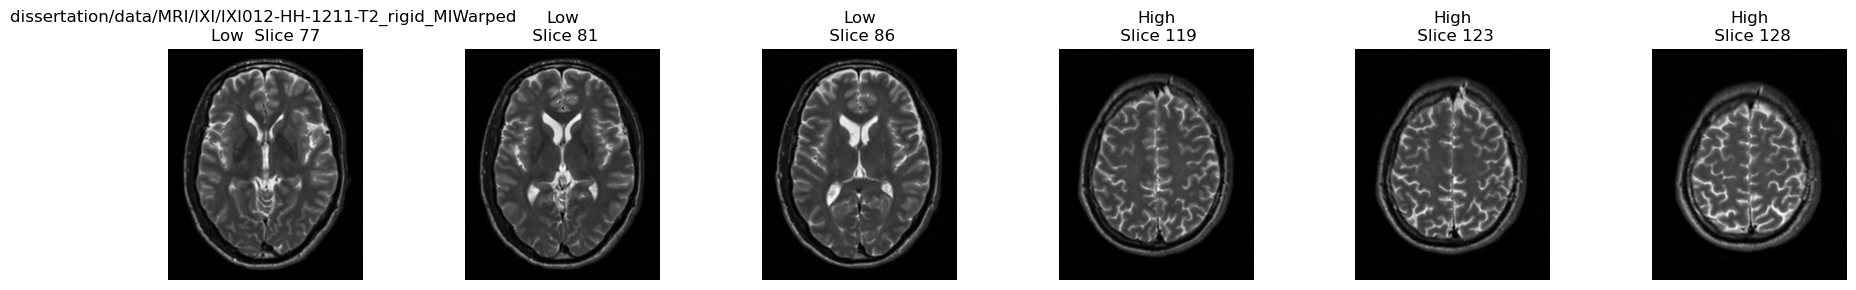

In [5]:
files_healthy_ph3 = glob.glob(os.path.expanduser('~/dissertation/data/MRI/IXI/*HH*T2_rigid_MIWarped.nii.gz'), recursive=True)

for scan in files_healthy_ph3:
    visualize_mri_low_high_slices(nib.load(scan), slice_positions_inferior=[#.37, .39, 
                                                                            .4, .42, .45, 
                                                                            #.48, .5, .52, .54 
                                                                           ])    
    break # keep saved notebook to minimal size
    

---

### Above scans binned below

---

In [6]:
#.34
s65_107 = ['1771', '2691', '2733']
#.37
s71_113 = ['1211', '1261', '1358', '1356', '1391', '1607', '1882', '1723', '2153', '2214', '2376', '2650', '2734', '2735']
#.39
s75_117 = ['1259', '1260', '1326', '1327', '1437', '1589', '1906', '2451']
#.40
s77_119 = ['1236', '1342', '1357', '1359', '1569', '1620', '1606', '2115', '2269', '2177', '2452', '2659', '2599', '2690', '2787']
#.42
s81_123 = ['1212', '1258', '1328', '1343', '2324', '1436', '1416', '1451', '1470', '1528', '1527', '1452', '1389', '1548', '1570', '1815', '1618', '1705', '1861', '1684', '1772', '1803', '1840', '2025', '2241', '2101', '2155', '2114', '2212', '2175', '2178', '2240', '2353', '2412', '2413', '2536', '2605', '2658', '2660', '2689', '2786']
#.45
s86_128 = ['1284', '1355', '1390', '1619', '1471', '1415', '1472', '1453', '1637', '2533', '1621', '1604', '1649', '1568', '1636', '1635', '1638', '1722', '1693', '1694', '1804', '1805', '2294', '1883', '1999', '1907', '2024', '2077', '2152', '2154', '2393', '2176', '2179', '2180', '2377', '2239', '2453', '2392', '2378', '2395', '2534', '2535', '2606', '2701', '2601', '2600', '2649', '2688', '2785']
#.48
s92_134 = ['1388', '1341', '1450', '1549', '1590', '1571', '1605', '1588', '1526', '1650', '1642', '2296', '1972', '1769', '1704', '1770', '1860', '1862', '1908', '2049', '2076', '2051', '2050', '2099', '2078', '2127', '2215', '2325', '2213', '2268', '2238', '2297', '2411', '2450', '2394', '2607', '2700', '2651', '2652', '2653']
#.5
s96_138 = ['1550', '1651', '1643', '1724', '2354', '1814', '1970', '2295', '1996', '2100', '2661', '2788']
#.52
s100_142 = ['2270']
#.54
s104_146 = ['1971', '2598']

---

### Copy Scans to Corresponding Folder

---

In [7]:
import shutil
import os

lists = [s71_113, s75_117, s77_119, s81_123, s86_128, s92_134, s96_138, s100_142, s104_146]
names = ['s71_113', 's75_117', 's77_119', 's81_123', 's86_128', 's92_134', 's96_138', 's100_142', 's104_146']

for l, n in zip(lists, names):
    # make dir
    dirname = os.path.expanduser(f'~/dissertation/data/MRI/IXI/registered_3T_HH_slices_{n[1:]}/')
    os.makedirs(os.path.dirname(dirname), exist_ok=True)

    # copy files
    for source in [x for x in files_healthy_ph3 if any(idx in x for idx in l)]:
        destination = os.path.expanduser(f'{dirname}{os.path.basename(source)}')
        shutil.copy(source, destination)


---

---

---

## IXI - 1.5T Philips (Guy's Hospital) - Healthy

---

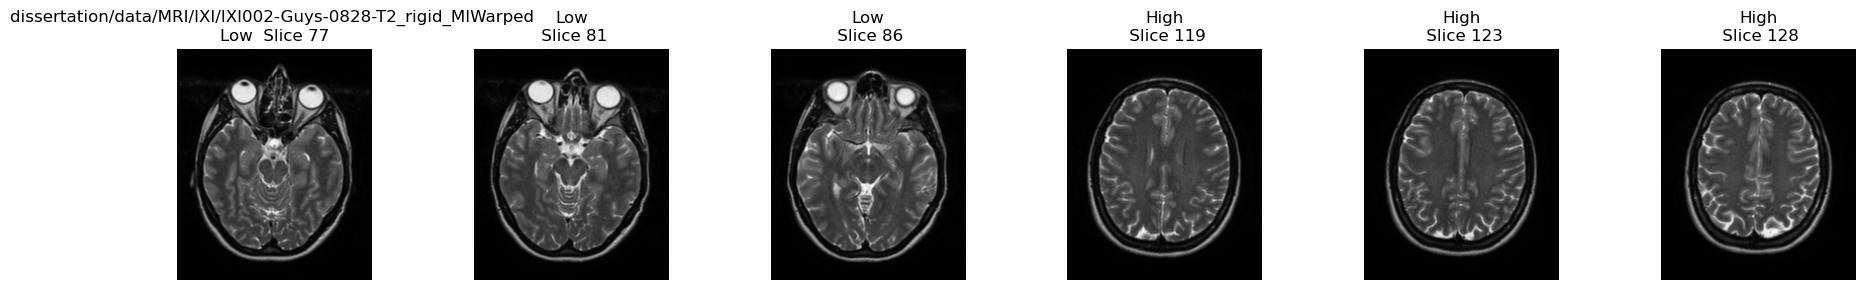

In [10]:
files_healthy_ph15 = glob.glob(os.path.expanduser('~/dissertation/data/MRI/IXI/*Guy*T2_rigid_MIWarped.nii.gz'), recursive=True)

for scan in files_healthy_ph15:
    visualize_mri_low_high_slices(nib.load(scan), slice_positions_inferior=[#.37, .39, 
                                                                            .4, .42, .45, 
                                                                            #.48, .5, .52, .54 
                                                                           ])
    
    break # keep saved notebook to minimal size
    

---

### Above scans binned below

---

In [11]:
#.37
s71_113 = ['0702', '0703', '0710', '0708', '0729', '0743', '0762', '0748', '0750', '0760', '0746', '0788', '0781', '0884', '0904', '0940', '1051', '1037', '1008', '1073', '1129', '1130', '1085', '1099', '1094', '1105', '1116']
#.39
s75_117 = ['0701', '0852', '0706', '0713', '0726', '0749', '0734', '0735', '0775', '0793', '0982', '0790', '0895', '0922', '0881', '0906', '0913', '0984', '1002', '1057', '1046', '1065', '1070', '1101', '1127', '1128', '1102', '1076', '1121', '1122', '1120']
#.40
s77_119 = ['0700', '0711', '0727', '0709', '0742', '0751', '0865', '0815', '0782', '0777', '0803', '0856', '0908', '0963', '0964', '1071', '1080', '1090', '1095']
#.42
s81_123 = ['0698', '0699', '0736', '0757', '0745', '0733', '0780', '0837', '0816', '0844', '0842', '0831', '0791', '0794', '0805', '0812', '0808', '0804', '0833', '0858', '0839', '0857', '0880', '0885', '0896', '0903', '0911', '0909', '0919', '0912', '0917', '0930', '0934', '1064', '0965', '0956', '1083', '0993', '0985', '1025', '1035', '1078', '1126', '1088', '1107']
#.45
s86_128 = ['0696', '1038', '0829', '0797', '0704', '0714', '0712', '0740', '0744', '0753', '0759', '0728', '0768', '0758', '0800', '0747', '0761', '0776', '0738', '0763', '0779', '0783', '0778', '0796', '0798', '0801', '0809', '0894', '0830', '0823', '0980', '0817', '0838', '0845', '0847', '1044', '0859', '0879', '0864', '0886', '0861', '0893', '0887', '0901', '0905', '0914', '0918', '0923', '0916', '0924', '0921', '0944', '0931', '0966', '0961', '0948', '0962', '0960', '0949', '0942', '0939', '0987', '1082', '0999', '0998', '0983', '1015', '1022', '1007', '1009', '1050', '1004', '1016', '1021', '1036', '1056', '1059', '1069', '1063', '1079', '1131', '1109', '1089', '1097', '1092', '1100', '1098', '1108', '1104']
#.48
s92_134 = ['0828', '0697', '0724', '0725', '0824', '0707', '0730', '0715', '0767', '0770', '0771', '0741', '0732', '0764', '0766', '0772', '0773', '0787', '0789', '0786', '0821', '0846', '0799', '0878', '0802', '0819', '0834', '0840', '1072', '0836', '0854', '0853', '0863', '0862', '0902', '0907', '0910', '0925', '0937', '0941', '0953', '0978', '0950', '0959', '0955', '0996', '1093', '0981', '1034', '1033', '1045', '1020', '1066', '1062', '1061', '1068', '1074', '1084', '1091', '1103', '1106']
#.5
s96_138 = ['0705', '0731', '0756', '0769', '0755', '0754', '0737', '0774', '0785', '0843', '0795', '0810', '0818', '0811', '0832', '0813', '0822', '1055', '0920', '0943', '0952', '0977', '0958', '0957', '1027', '0997', '1005', '1018', '1032', '1054', '1067', '1077', '1118']
#.52
s100_142 = ['0855', '0765', '0841', '0938', '1024', '1028', '0986', '0979', '0992']
#.54
s104_146 = ['0752', '1049', '1019', '1014', '1026']

---

### Copy Scans to Corresponding Folder

---

In [12]:
import shutil
import os

lists = [s71_113, s75_117, s77_119, s81_123, s86_128, s92_134, s96_138, s100_142, s104_146]
names = ['s71_113', 's75_117', 's77_119', 's81_123', 's86_128', 's92_134', 's96_138', 's100_142', 's104_146']

for l, n in zip(lists, names):
    # make dir
    dirname = os.path.expanduser(f'~/dissertation/data/MRI/IXI/registered_15T_Guys_slices_{n[1:]}/')
    os.makedirs(os.path.dirname(dirname), exist_ok=True)

    # copy files
    for source in [x for x in files_healthy_ph15 if any(idx in os.path.basename(x) for idx in l)]:
        destination = os.path.expanduser(f'{dirname}{os.path.basename(source)}')
        shutil.copy(source, destination)


---

---

---

## IXI - 1.5T GE (Institute of Psychiatry) - Healthy

---

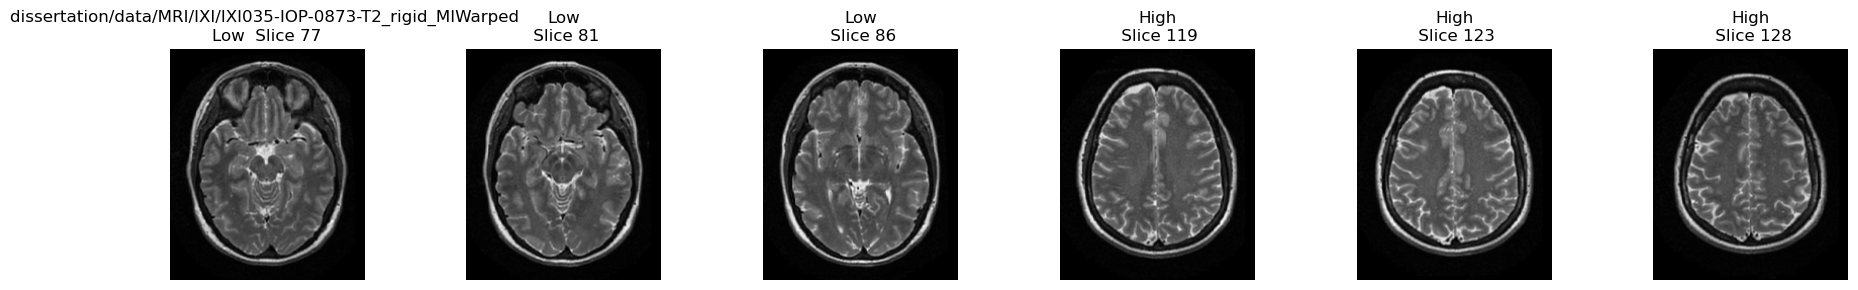

In [13]:
files_healthy_ge15 = glob.glob(os.path.expanduser('~/dissertation/data/MRI/IXI/*IOP*T2_rigid_MIWarped.nii.gz'), recursive=True)

for scan in files_healthy_ge15:
    visualize_mri_low_high_slices(nib.load(scan), slice_positions_inferior=[#.37, .39, 
                                                                            .4, .42, .45, 
                                                                            #.48, .5, .52, .54 
                                                                           ])
    
    break # keep saved notebook to minimal size
    

---

### Above scans binned below

---

In [14]:
#.37
s71_113 = ['0869', '0882', '0877', '0876', '0968', '0889', '0891', '0971', '0972', '1135', '0969', '1011', '1043', '1136', '1030', '1138', '1142', '1150', '1151', '1153', '1159', '1161']
#.39
s75_117 = ['0926', '0929', '0915', '0970', '0973', '1012', '1041', '1137', '1143']
#.40
s77_119 = ['0892', '0927', '0991', '0988']
#.42
s81_123 = ['0898', '0871', '0872', '0888', '0974', '0990', '1010', '1141', '1144', '1145', '1147', '1148', '1154', '1160']
#.45
s86_128 = ['0873', '0870', '0874', '0867', '0890', '1134', '0928', '0989', '1029', '1139', '1140', '1146', '1149', '1152', '1155', '1156', '1157', '1158']
#.48
s92_134 = ['0866', '0875', '0883', '0868', '1040', '1042']
#.5
s96_138 = ['0967']

---

### Copy Scans to Corresponding Folder

---

In [15]:
import shutil
import os

lists = [s71_113, s75_117, s77_119, s81_123, s86_128, s92_134, s96_138]#, s100_142, s104_146]
names = ['s71_113', 's75_117', 's77_119', 's81_123', 's86_128', 's92_134', 's96_138']#, 's100_142', 's104_146']

for l, n in zip(lists, names):
    # make dir
    dirname = os.path.expanduser(f'~/dissertation/data/MRI/IXI/registered_15T_IOP_slices_{n[1:]}/')
    os.makedirs(os.path.dirname(dirname), exist_ok=True)

    # copy files
    for source in [x for x in files_healthy_ge15 if any(idx in x for idx in l)]:
        destination = os.path.expanduser(f'{dirname}{os.path.basename(source)}')
        shutil.copy(source, destination)


---

---

---

## Muslim et al. - 1.5T (Iraq) - MS

---

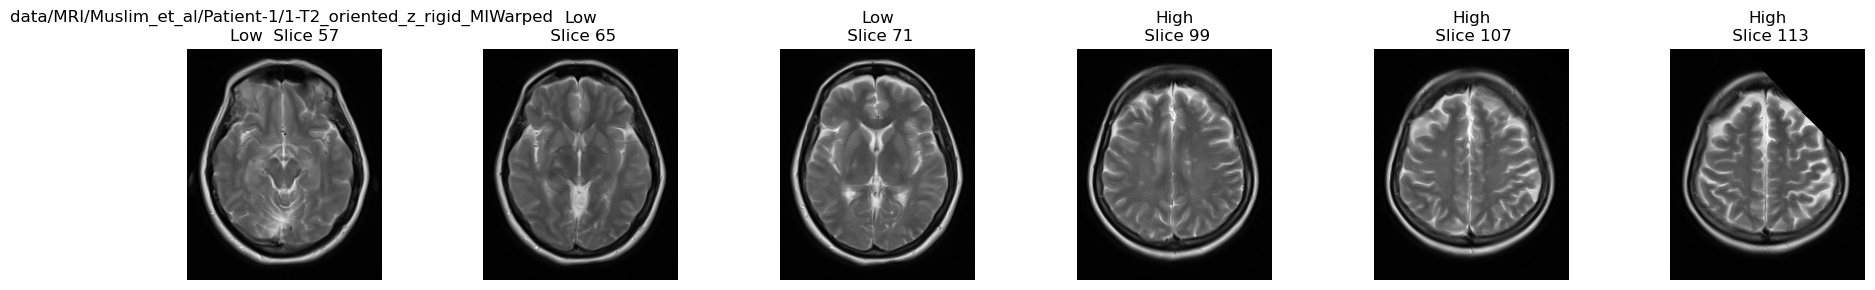

In [16]:
#
# original shape == (256, 256, x) per 
#   3-0__Muslim_et_al_T2_orientation-pixdim_fix.ipynb => 
#   3-4__Muslim_et_al_post_registration_inspection.ipynb
#
x256_y256 = [1, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 24, 25, 27, 29, 30, 4, 44, 46, 47, 49, 5, 50, 51, 52, 58, 6, 60, 7, 8]
files_ms_muslim_15t = [os.path.expanduser(f'~/dissertation/data/MRI/Muslim_et_al/Patient-{i}/{i}-T2_oriented_z_rigid_MIWarped.nii.gz') for i in x256_y256]

for scan in files_ms_muslim_15t:
    visualize_mri_low_high_slices(nib.load(scan), 
                                  slice_positions_inferior=[0.3, .34, .37, #.39, 
                                                            #.4, .42, .45, 
                                                            #.48, .5, .52, .54 
                                                            ])
    
    break # keep saved notebook to minimal size
    

---

### Above scans binned below

---

In [17]:
#.34
s65_107 = ['1', '12', '20', '52', '58', '60']
#.37
s71_113 = ['11', '13', '15', '17', '18', '21', '22', '24', '25', '27', '29', '30', '44', '5', '7']
#.39
s75_117 = ['47', '49', '50', '6', '8']
#.40
s77_119 = ['19', '4', '51']
# scan 46 removed due to post-registration orientation

---

### Copy Scans to Corresponding Folder

---

In [18]:
import shutil
import os

lists = [s65_107, s71_113, s75_117, s77_119]
names = ['s65_107', 's71_113', 's75_117', 's77_119']

for l, n in zip(lists, names):
    # make dir
    dirname = os.path.expanduser(f'~/dissertation/data/MRI/Muslim_et_al/registered_256x256/registered_15T_Muslim_et_al_slices_{n[1:]}/')
    os.makedirs(os.path.dirname(dirname), exist_ok=True)

    # copy files
    for source in [x for x in files_ms_muslim_15t if any(f"/{idx}-T2" in x for idx in l)]:
        destination = os.path.expanduser(f'{dirname}{os.path.basename(source)}')
        shutil.copy(source, destination)


---

---

---

## ISBI - 3T Philips (John Hopkins) - MS

---

### Training set

---

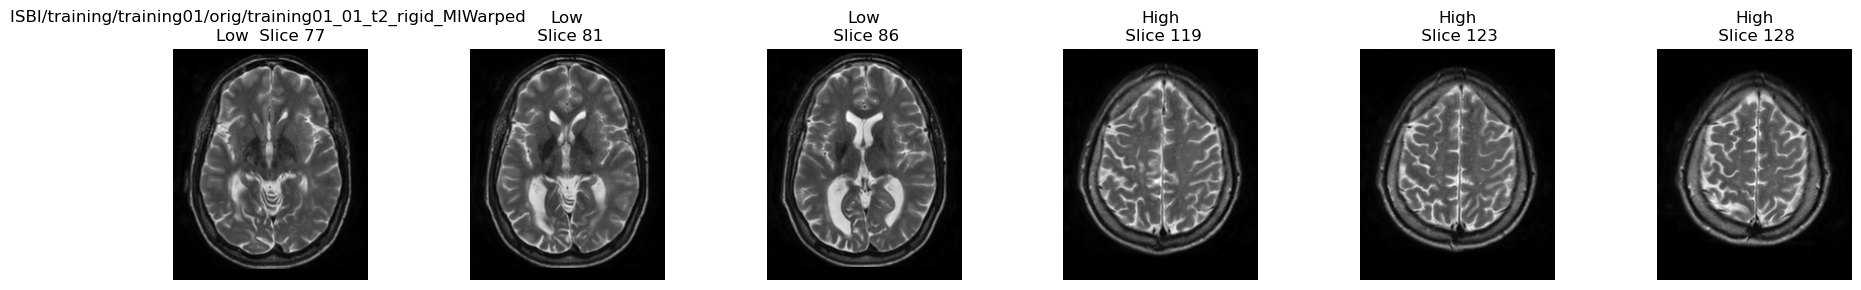

In [19]:
files_ms_isbi_ph3 = glob.glob(os.path.expanduser('~/dissertation/data/MRI/ISBI/training/training*/orig/*t2_rigid_MIWarped.nii.gz'), recursive=True)

for scan in files_ms_isbi_ph3:
    visualize_mri_low_high_slices(nib.load(scan), slice_positions_inferior=[#.37, .39, 
                                                                            .4, .42, .45, 
                                                                            #.48, .5, .52, .54 
                                                                           ])
    
    break # keep saved notebook to minimal size
    

---

#### Above scans binned below

---

In [20]:
#.39
s75_117 = ['01_01', '04_04']
#.40
s77_119 = ['01_03', '01_04', '03_03', '03_04', '04_01', '04_02', '04_03', '05_02']
#.42
s81_123 = ['01_02', '02_01', '03_02']
#.45
s86_128 = ['02_02', '02_03', '02_04', '03_01', '05_03']
#.48
s92_134 = ['03_05', '05_01', '05_04']

---

#### Copy Scans to Corresponding Folder

---

In [21]:
import shutil
import os

lists = [s75_117, s77_119, s81_123, s86_128, s92_134]
names = ['s75_117', 's77_119', 's81_123', 's86_128', 's92_134']

for l, n in zip(lists, names):
    # make dir
    dirname = os.path.expanduser(f'~/dissertation/data/MRI/ISBI/registered_train/registered_3T_ISBI_slices_{n[1:]}/')
    os.makedirs(os.path.dirname(dirname), exist_ok=True)

    # copy files
    for source in [x for x in files_ms_isbi_ph3 if any(idx in x for idx in l)]:
        destination = os.path.expanduser(f'{dirname}{os.path.basename(source)}')
        shutil.copy(source, destination)


---

---

### Testing set

---

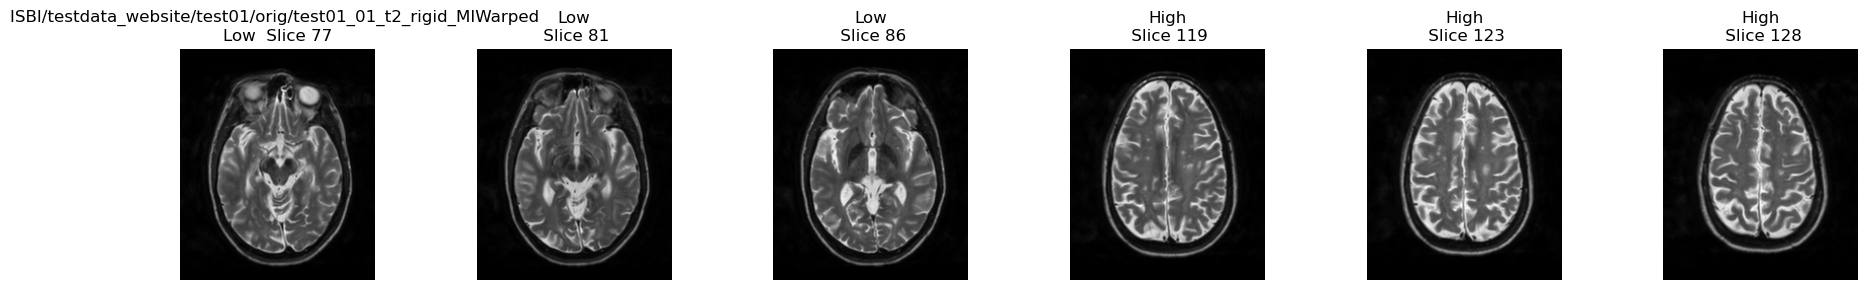

In [22]:
files_ms_isbi_ph3_test = glob.glob(os.path.expanduser('~/dissertation/data/MRI/ISBI/testdata_website/test*/orig/*t2_rigid_MIWarped.nii.gz'), recursive=True)

for scan in files_ms_isbi_ph3_test:
    visualize_mri_low_high_slices(nib.load(scan), slice_positions_inferior=[#.37, .39, 
                                                                            .4, .42, .45, 
                                                                            #.48, .5, .52, .54 
                                                                           ])
    
    break # keep saved notebook to minimal size
    

---

#### Above scans binned below

---

In [23]:
#.37
s71_113 = ['05_01', '08_01', '13_02']
#.40
s77_119 = ['06_04', '08_02', '08_03', '08_04', '11_03', '12_02', '12_04']
#.42
s81_123 = ['01_02', '01_03', '03_01', '06_01', '06_02', '06_03', '11_04', '11_05', '12_01', '12_03']
#.45
s86_128 = ['01_01', '01_04', '02_01', '02_02', '02_04', '03_03', '04_01', '05_02', '05_03', '05_04', '07_01', '07_02', '07_03', '07_04', '09_01', '10_02', '10_04', '10_05', '10_06']
#.48
s92_134 = ['02_03', '02_05', '03_02', '03_04', '04_02', '04_03', '04_04', '09_02', '09_04', '10_01', '10_03', '11_01', '11_02', '13_01', '13_03', '13_04', '14_01', '14_02', '14_03', '14_04', '14_05']
#.5
s96_138 = ['09_03']

---

#### Copy Scans to Corresponding Folder

---

In [24]:
import shutil
import os

lists = [s71_113, s77_119, s81_123, s86_128, s92_134, s96_138]
names = ['s71_113', 's77_119', 's81_123', 's86_128', 's92_134', 's96_138']

for l, n in zip(lists, names):
    # make dir
    dirname = os.path.expanduser(f'~/dissertation/data/MRI/ISBI/registered_test/registered_3T_ISBI_slices_{n[1:]}/')
    os.makedirs(os.path.dirname(dirname), exist_ok=True)

    # copy files
    for source in [x for x in files_ms_isbi_ph3_test if any(idx in x for idx in l)]:
        destination = os.path.expanduser(f'{dirname}{os.path.basename(source)}')
        shutil.copy(source, destination)


---

---

---

# Get Output Directories

---

In [25]:
import os
import glob

# Using glob to find directories matching *_slices_* at any depth below PWD
matching_dirs = [d for d in glob.glob('**/*_slices_*', recursive=True) if os.path.isdir(d)]

# Print results
for d in matching_dirs:
    print(d)

ISBI/registered_test/registered_3T_ISBI_slices_71_113
ISBI/registered_test/registered_3T_ISBI_slices_77_119
ISBI/registered_test/registered_3T_ISBI_slices_81_123
ISBI/registered_test/registered_3T_ISBI_slices_86_128
ISBI/registered_test/registered_3T_ISBI_slices_92_134
ISBI/registered_test/registered_3T_ISBI_slices_96_138
ISBI/registered_train/registered_3T_ISBI_slices_75_117
ISBI/registered_train/registered_3T_ISBI_slices_77_119
ISBI/registered_train/registered_3T_ISBI_slices_81_123
ISBI/registered_train/registered_3T_ISBI_slices_86_128
ISBI/registered_train/registered_3T_ISBI_slices_92_134
IXI/registered_15T_Guys_slices_100_142
IXI/registered_15T_Guys_slices_104_146
IXI/registered_15T_Guys_slices_71_113
IXI/registered_15T_Guys_slices_75_117
IXI/registered_15T_Guys_slices_77_119
IXI/registered_15T_Guys_slices_81_123
IXI/registered_15T_Guys_slices_86_128
IXI/registered_15T_Guys_slices_92_134
IXI/registered_15T_Guys_slices_96_138
IXI/registered_15T_IOP_slices_71_113
IXI/registered_15T_I

---

# Extract Slices to Grayscale Files

---

In [31]:
import numpy as np
from PIL import Image

# List of directories to process.
directories = matching_dirs

# Process each directory.
for dir_path in directories:
    # Extract the slice range from the directory name.
    # We assume the directory name ends with "slices_<start>_<end>"
    base_name = os.path.basename(dir_path)
    if "slices_" not in base_name:
        print(f"Directory {dir_path} does not have 'slices_' in its name. Skipping.")
        continue
    try:
        # e.g. "registered_3T_ISBI_slices_71_113" -> "71_113"
        range_part = base_name.split("slices_")[-1]
        slice_start_str, slice_end_str = range_part.split("_")
        slice_start = int(slice_start_str)
        slice_end = int(slice_end_str)
    except Exception as e:
        print(f"Could not parse slice range in {dir_path}: {e}")
        continue

    # Process each .nii.gz file in the directory.
    for fname in os.listdir(dir_path):
        if not fname.endswith(".nii.gz"):
            continue  # skip non-nifti files

        file_path = os.path.join(dir_path, fname)

        # Determine the destination based on the containing directory.
        # Use the file name slicing to build a subfolder.
        if dir_path.startswith("ISBI/registered_test"):
            dest_base = f"./_MS__ISBI_3T_test/{fname[4:9]}"
        elif dir_path.startswith("ISBI/registered_train"):
            dest_base = f"./_MS__ISBI_3T_train/{fname[8:13]}"
        elif dir_path.startswith("IXI/registered_15T_Guys"):
            dest_base = f"./_Healthy__IXI_15T_Guys/{fname[7:16]}"
        elif dir_path.startswith("IXI/registered_15T_IOP"):
            dest_base = f"./_Healthy__IXI_15T_IOP/{fname[7:15]}"
        elif dir_path.startswith("IXI/registered_3T_HH"):
            dest_base = f"./_Healthy__IXI_3T/{fname[7:14]}"
        elif dir_path.startswith("Muslim_et_al/registered_256x256"):
            dest_base = f"./_MS__Muslim_et_al_15T/{fname[:2].split('-')[0]}"
        else:
            print(f"Unknown category for {dir_path}. Skipping file {fname}.")
            continue

        # Create the destination directory if it doesn't exist.
        os.makedirs(dest_base, exist_ok=True)

        # Load the nifti image.
        try:
            nii_img = nib.load(file_path)
            data = nii_img.get_fdata()  # typically shape (X, Y, Z)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
            continue

        # Loop over the slice indices indicated by the directory’s suffix.
        for i in range(slice_start, slice_end + 1):
            if i >= data.shape[2]:
                print(f"Slice index {i} out of range for file {file_path}.")
                continue

            # Extract the i-th axial (2D) slice.
            slice_data = data[:, :, i]

            # Normalize the slice to 0–255 (if not constant).
            smin, smax = slice_data.min(), slice_data.max()
            if smax > smin:
                norm_slice = ((slice_data - smin) / (smax - smin) * 255).astype(np.uint8)
            else:
                norm_slice = np.zeros(slice_data.shape, dtype=np.uint8) # all slice pixels are same

            # Create a filename that indicates the slice index.
            slice_fname = f"slice_{i:03d}.png"

            # Save the slice image.
            out_path = os.path.join(dest_base, slice_fname)
            try:
                Image.fromarray(norm_slice).save(out_path)
            except Exception as e:
                print(f"Could not save slice {i} from {file_path} to {out_path}: {e}")

        print(f"Processed {fname} from {dir_path} into {dest_base}")


Processed test05_01_t2_rigid_MIWarped.nii.gz from ISBI/registered_test/registered_3T_ISBI_slices_71_113 into ./_MS__ISBI_3T_test/05_01
Processed test08_01_t2_rigid_MIWarped.nii.gz from ISBI/registered_test/registered_3T_ISBI_slices_71_113 into ./_MS__ISBI_3T_test/08_01
Processed test13_02_t2_rigid_MIWarped.nii.gz from ISBI/registered_test/registered_3T_ISBI_slices_71_113 into ./_MS__ISBI_3T_test/13_02
Processed test06_04_t2_rigid_MIWarped.nii.gz from ISBI/registered_test/registered_3T_ISBI_slices_77_119 into ./_MS__ISBI_3T_test/06_04
Processed test08_02_t2_rigid_MIWarped.nii.gz from ISBI/registered_test/registered_3T_ISBI_slices_77_119 into ./_MS__ISBI_3T_test/08_02
Processed test08_03_t2_rigid_MIWarped.nii.gz from ISBI/registered_test/registered_3T_ISBI_slices_77_119 into ./_MS__ISBI_3T_test/08_03
Processed test08_04_t2_rigid_MIWarped.nii.gz from ISBI/registered_test/registered_3T_ISBI_slices_77_119 into ./_MS__ISBI_3T_test/08_04
Processed test11_03_t2_rigid_MIWarped.nii.gz from ISBI/

---

---

---

In [32]:
import os
import glob

matching_dirs = [d for d in glob.glob(os.path.expanduser('~/dissertation/data/MRI/_[MH]*/*'), recursive=True) if os.path.isdir(d)]

# Print results
for d in matching_dirs:
    print(d)

/uufs/chpc.utah.edu/common/home/u0740821/dissertation/data/MRI/_Healthy__IXI_15T_Guys/Guys-0696
/uufs/chpc.utah.edu/common/home/u0740821/dissertation/data/MRI/_Healthy__IXI_15T_Guys/Guys-0697
/uufs/chpc.utah.edu/common/home/u0740821/dissertation/data/MRI/_Healthy__IXI_15T_Guys/Guys-0698
/uufs/chpc.utah.edu/common/home/u0740821/dissertation/data/MRI/_Healthy__IXI_15T_Guys/Guys-0699
/uufs/chpc.utah.edu/common/home/u0740821/dissertation/data/MRI/_Healthy__IXI_15T_Guys/Guys-0700
/uufs/chpc.utah.edu/common/home/u0740821/dissertation/data/MRI/_Healthy__IXI_15T_Guys/Guys-0701
/uufs/chpc.utah.edu/common/home/u0740821/dissertation/data/MRI/_Healthy__IXI_15T_Guys/Guys-0702
/uufs/chpc.utah.edu/common/home/u0740821/dissertation/data/MRI/_Healthy__IXI_15T_Guys/Guys-0703
/uufs/chpc.utah.edu/common/home/u0740821/dissertation/data/MRI/_Healthy__IXI_15T_Guys/Guys-0704
/uufs/chpc.utah.edu/common/home/u0740821/dissertation/data/MRI/_Healthy__IXI_15T_Guys/Guys-0705
/uufs/chpc.utah.edu/common/home/u0740821

---

---

# Total Scans and Slices

---

In [64]:
import itertools
slice_folders_ms_isbi_ph3_test = [x for x in matching_dirs if '_MS__ISBI_3T_test' in x]
slice_folders_ms_isbi_ph3_train = [x for x in matching_dirs if '_MS__ISBI_3T_train' in x]
slice_folders_ms_muslim_15t = [x for x in matching_dirs if '_MS__Muslim_et_al_15T' in x]
slice_folders_healthy_ph3 = [x for x in matching_dirs if '_Healthy__IXI_3T' in x]
slice_folders_healthy_ph15 = [x for x in matching_dirs if '_Healthy__IXI_15T_Guys' in x]
slice_folders_healthy_ge15 = [x for x in matching_dirs if '_Healthy__IXI_15T_IOP' in x]


print(f'slice_folders_ms_isbi_ph3_test\n----------\nNumber of scans: {len(slice_folders_ms_isbi_ph3_test)}\nNumber of slices: {len(slice_folders_ms_isbi_ph3_test) * 43}')
print(f"Actual # slices:  {len(list(itertools.chain(*[glob.glob(os.path.join(folder, '*.png')) for folder in slice_folders_ms_isbi_ph3_test])))}\n\n")

print(f'slice_folders_ms_isbi_ph3_train\n----------\nNumber of scans: {len(slice_folders_ms_isbi_ph3_train)}\nNumber of slices: {len(slice_folders_ms_isbi_ph3_train) * 43}')
print(f"Actual # slices:  {len(list(itertools.chain(*[glob.glob(os.path.join(folder, '*.png')) for folder in slice_folders_ms_isbi_ph3_train])))}\n\n")

print(f'slice_folders_ms_muslim_15t\n----------\nNumber of scans: {len(slice_folders_ms_muslim_15t)}\nNumber of slices: {len(slice_folders_ms_muslim_15t) * 43}')
print(f"Actual # slices:  {len(list(itertools.chain(*[glob.glob(os.path.join(folder, '*.png')) for folder in slice_folders_ms_muslim_15t])))}\n\n")

print(f'slice_folders_healthy_ph3\n----------\nNumber of scans: {len(slice_folders_healthy_ph3)}\nNumber of slices: {len(slice_folders_healthy_ph3) * 43}')
print(f"Actual # slices:  {len(list(itertools.chain(*[glob.glob(os.path.join(folder, '*.png')) for folder in slice_folders_healthy_ph3])))}\n\n")

print(f'slice_folders_healthy_ph15\n----------\nNumber of scans: {len(slice_folders_healthy_ph15)}\nNumber of slices: {len(slice_folders_healthy_ph15) * 43}')
print(f"Actual # slices:  {len(list(itertools.chain(*[glob.glob(os.path.join(folder, '*.png')) for folder in slice_folders_healthy_ph15])))}\n\n")

print(f'slice_folders_healthy_ge15\n----------\nNumber of scans: {len(slice_folders_healthy_ge15)}\nNumber of slices: {len(slice_folders_healthy_ge15) * 43}')
print(f"Actual # slices:  {len(list(itertools.chain(*[glob.glob(os.path.join(folder, '*.png')) for folder in slice_folders_healthy_ge15])))}\n\n")



slice_folders_ms_isbi_ph3_test
----------
Number of scans: 61
Number of slices: 2623
Actual # slices:  2623


slice_folders_ms_isbi_ph3_train
----------
Number of scans: 21
Number of slices: 903
Actual # slices:  903


slice_folders_ms_muslim_15t
----------
Number of scans: 29
Number of slices: 1247
Actual # slices:  1247


slice_folders_healthy_ph3
----------
Number of scans: 182
Number of slices: 7826
Actual # slices:  7826


slice_folders_healthy_ph15
----------
Number of scans: 319
Number of slices: 13717
Actual # slices:  13717


slice_folders_healthy_ge15
----------
Number of scans: 74
Number of slices: 3182
Actual # slices:  3182




---

---

---

---

---